# Proyek Akhir: Menyelesaikan Permasalahan Jaya jaya institut

- Nama: Nur Huda Riyantoni  
- Email: riyantoni2772@gmail.com    
- Id Dicoding: Nur Huda Riyantoni

## Persiapan

Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

### Hipotesa

dalam hal dropout maka hipotesa yang saya ambil diantaranya:
1. Status sudah menikah sehingga sulit fokus kuliah 
2. Masalah financial (hubungannya dengan kolom data pekerjaan ortu ) [terbukti bahwa pekerjaannya adalah unskilled workers]
3. Masalah latar belakang ortu (hubungannya dengan kolom ortu qualification) [terbukti bahwa kebanyakan latar belakang hanya tamat SD saja]
4. Program studi yang diambil (mungkin salah jurusan/frustasi) [paling banyak jurusan keperawatan]
5. tidak lulus di semester sebelumnya (jadi kita lihat history kuliahnya gimana, apakah niat atau tidak)
6. Murid beasiswa atau tidaknya
7. Course pembuat tidak lulus evaluasi semester 1 dan 2

untuk menjawab itu buat stacked barchart untuk:
1. Antara status dan marital status (marital status ini gimana efeknya? apakah banyak yang tidak lulus gara2 menikah)
2. Antara murid beasiswa dan tidak (efek kah beasiswa dengan kelulusan)
3. Course dengan kelulusan (apakah ngefek ?)

## Data Understanding

In [2]:
data = pd.read_excel("data.xlsx")
data

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,1.266667e+16,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,1.100000e+01,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,1.350000e+01,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,1.200000e+01,0,9.4,-0.8,-3.12,Graduate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
data.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,3.928634e+15,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.970124e+15,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,1.100000e+01,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,1.300000e+01,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,1.166667e+16,0.000000,13.900000,2.600000,1.790000,NaN


### Visualisasi Data

C:\Users\riyantoni\AppData\Local\Temp\ipykernel_13888\1327743574.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Jumlah'    : [data['Status'].value_counts()[0], data['Status'].value_counts()[1],data['Status'].value_counts()[2]]
C:\Users\riyantoni\AppData\Local\Temp\ipykernel_13888\1327743574.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Jumlah'    : [data['Status'].value_counts()[0], data['Status'].value_counts()[1],data['Status'].value_counts()[2]]
C:\Users\riyantoni\AppData\Local\Temp\ipykernel_13888\1327743574.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

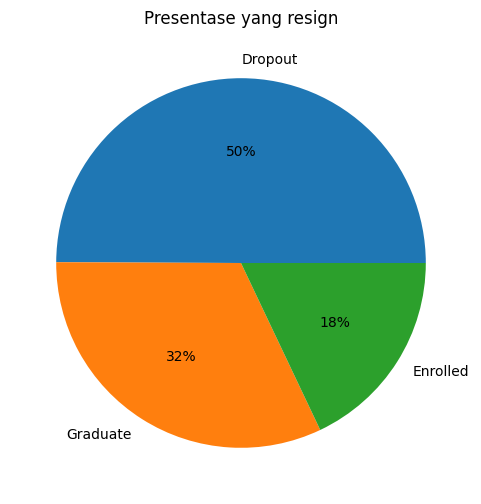

In [5]:
datas = pd.DataFrame({
    'Status'  : ["Dropout","Graduate","Enrolled"],
    'Jumlah'    : [data['Status'].value_counts()[0], data['Status'].value_counts()[1],data['Status'].value_counts()[2]]
})
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(x= 'Jumlah', labels='Status', data = datas, autopct="%1.0f%%")
plt.title("Presentase yang resign")
plt.show()

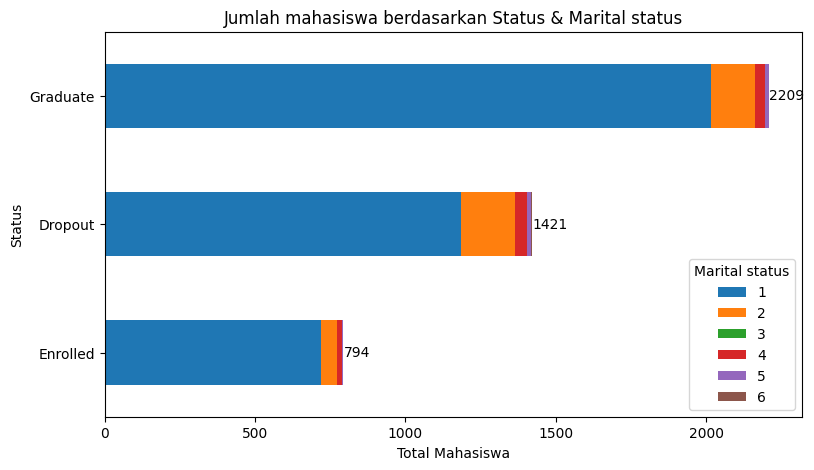

In [6]:
# Grouping and counting the data
grouped_data = data.groupby(['Status', 'Marital_status'])['Status'].count().unstack()

# Calculating the total counts for each campus and sorting
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=True).index

# Reordering the original grouped data
grouped_data = grouped_data.loc[sorted_data]

fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the data
grouped_data.plot(kind='barh', stacked=True, ax=ax)

totals = grouped_data.sum(axis=1).astype(int)
for i, total in enumerate(totals):
    ax.text(total + 1, i, str(total), va='center') 
plt.title("Jumlah mahasiswa berdasarkan Status & Marital status")
plt.xlabel("Total Mahasiswa")
plt.ylabel("Status")
plt.legend(title='Marital status')
plt.show()

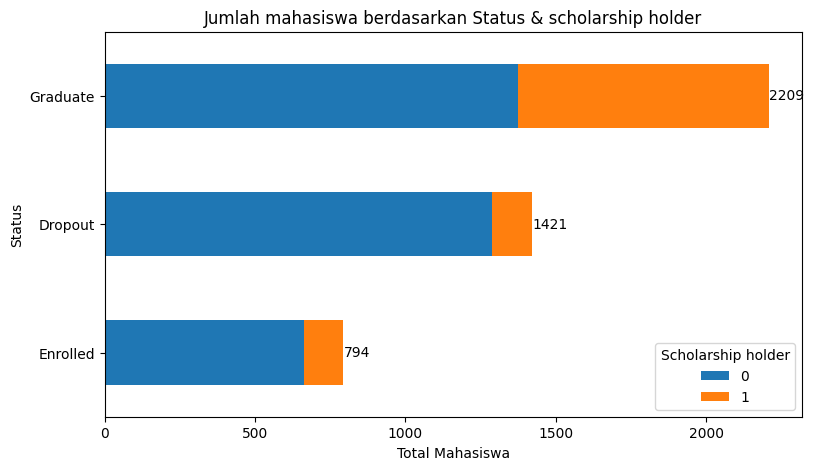

In [7]:
# Grouping and counting the data
grouped_data = data.groupby(['Status', 'Scholarship_holder'])['Status'].count().unstack()

# Calculating the total counts for each campus and sorting
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=True).index

# Reordering the original grouped data
grouped_data = grouped_data.loc[sorted_data]

fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the data
grouped_data.plot(kind='barh', stacked=True, ax=ax)

totals = grouped_data.sum(axis=1).astype(int)
for i, total in enumerate(totals):
    ax.text(total + 1, i, str(total), va='center') 
plt.title("Jumlah mahasiswa berdasarkan Status & scholarship holder")
plt.xlabel("Total Mahasiswa")
plt.ylabel("Status")
plt.legend(title='Scholarship holder')
plt.show()

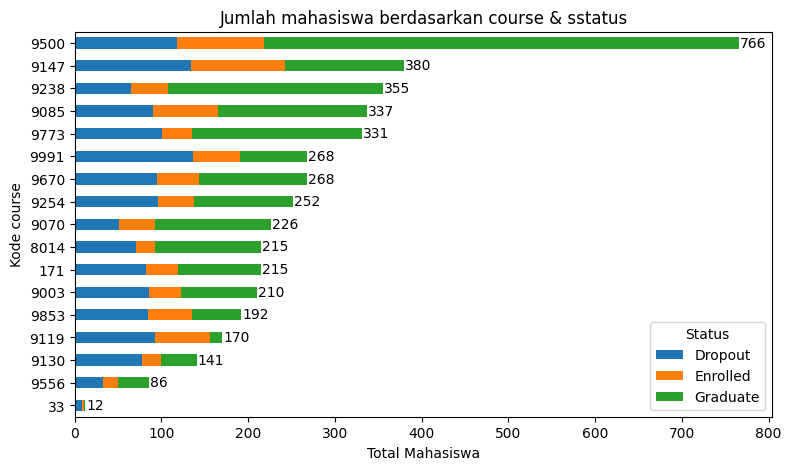

In [8]:
# Grouping and counting the data
grouped_data = data.groupby(['Course', 'Status'])['Status'].count().unstack()

# Calculating the total counts for each campus and sorting
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=True).index

# Reordering the original grouped data
grouped_data = grouped_data.loc[sorted_data]

fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the data
grouped_data.plot(kind='barh', stacked=True, ax=ax)

totals = grouped_data.sum(axis=1).astype(int)
for i, total in enumerate(totals):
    ax.text(total + 1, i, str(total), va='center') 
plt.title("Jumlah mahasiswa berdasarkan course & sstatus")
plt.xlabel("Total Mahasiswa")
plt.ylabel("Kode course")
plt.legend(title='Status')
plt.show()

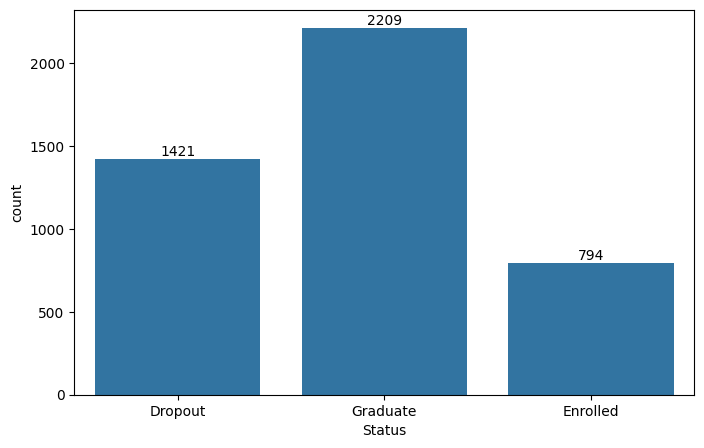

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x="Status")

# Tambahkan label jumlah di atas setiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.5,      # posisi label sedikit di atas bar
            count, 
            ha='center', va='bottom')

plt.show()

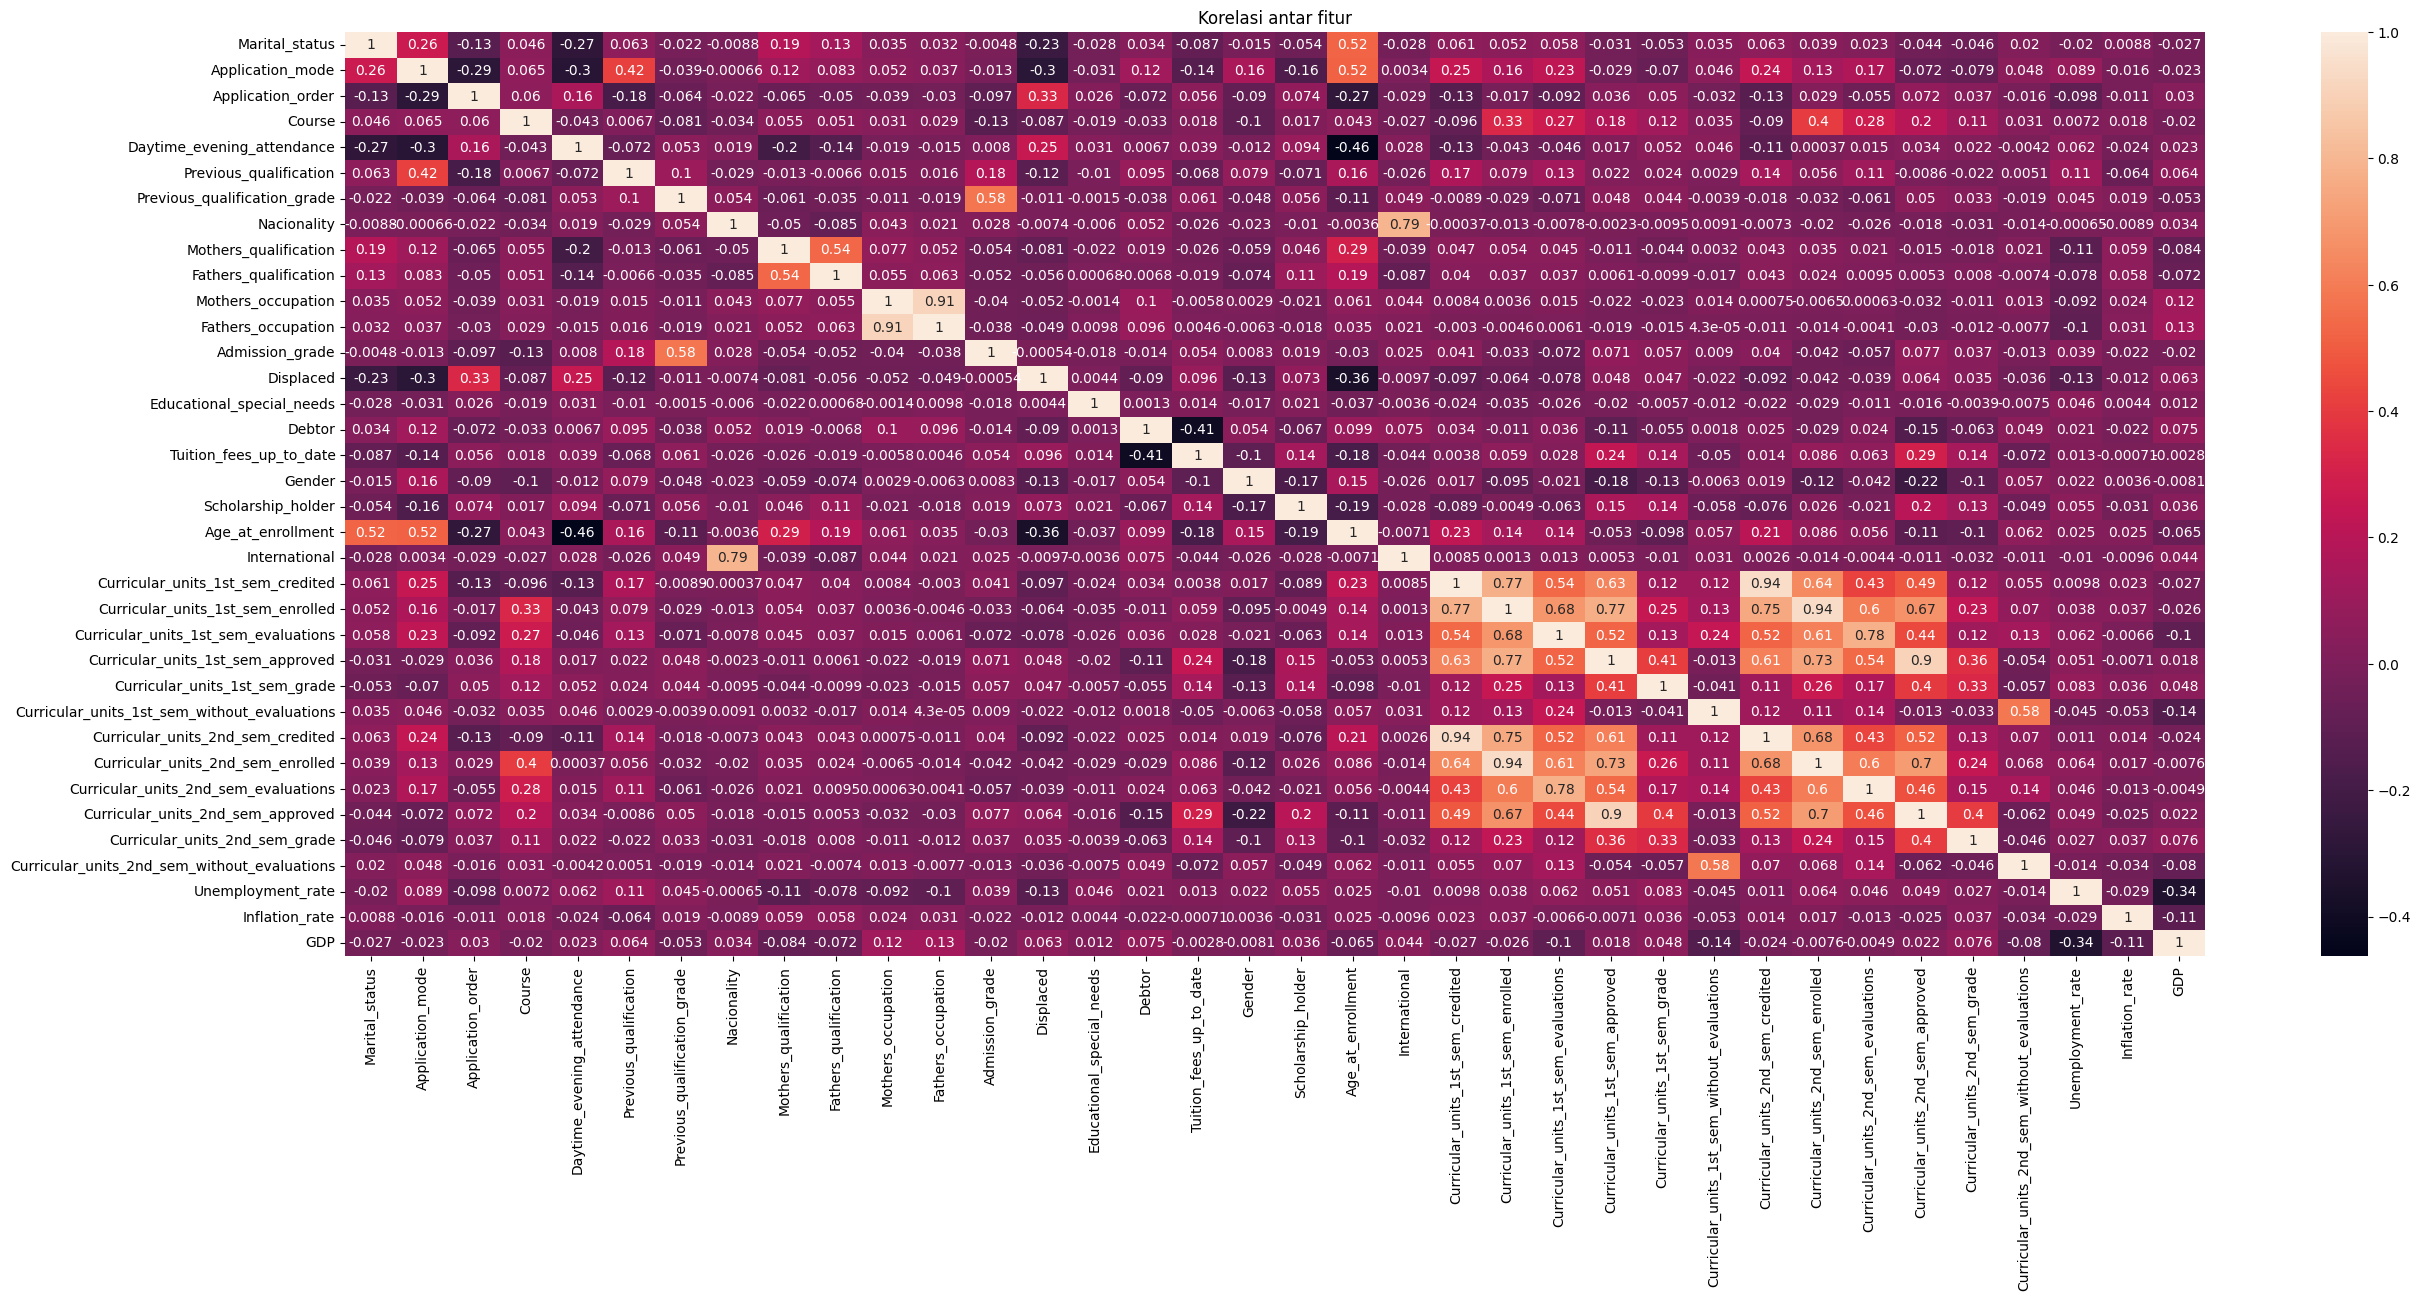

In [6]:
#Seleksi fitur dengan korelasi heatmap
plt.figure(figsize=(30,12))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(method='pearson'), annot =True)
plt.title('Korelasi antar fitur')
plt.show()

## Data Preparation / Preprocessing

Drop kolom yang tidak diperlukan

In [9]:
columns_to_drop = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification'
                  ,'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
                  'Gender', 'Scholarship_holder', 'International', 'Unemployment_rate', 'Inflation_rate', 'GDP']

new_data = data.drop(columns=columns_to_drop, axis = 1)

In [11]:
new_data.shape

(4424, 16)

Splitting Data

In [12]:
train_df, test_df = train_test_split(new_data, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(3539, 16)
(885, 16)


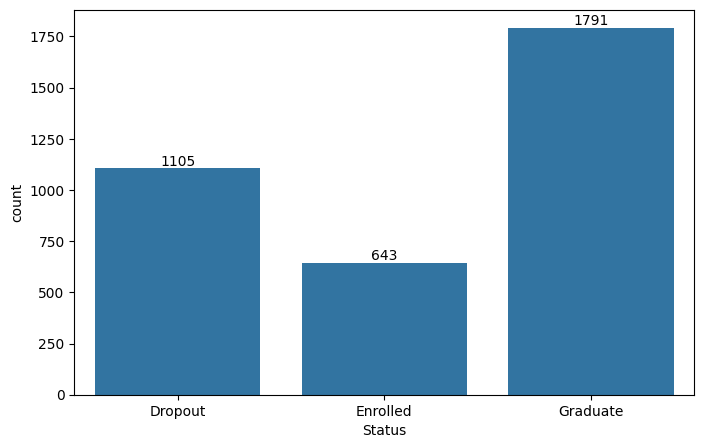

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train_df, x="Status")
# Tambahkan label jumlah di atas setiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.5,      # posisi label sedikit di atas bar
            count, 
            ha='center', va='bottom')
plt.show()

#### Proses oversampling

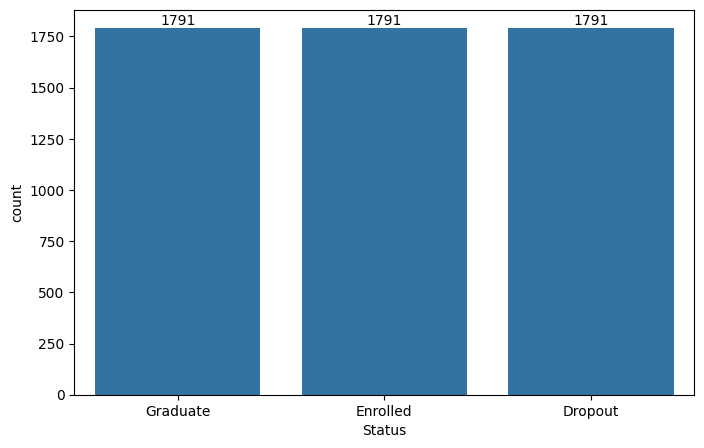

In [14]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]
 
 
df_majority_2_undersampled = resample(df_majority_2, n_samples=1791, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=1791, random_state=42)
 
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
 
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=oversampled_train_df, x="Status")
# Tambahkan label jumlah di atas setiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.5,      # posisi label sedikit di atas bar
            count, 
            ha='center', va='bottom')
plt.show()

### Encoding & Scaling

In [15]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [16]:
def scaling(features, df, df_test=None):
    os.makedirs("model", exist_ok=True)  # Pastikan folder model ada
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df
 
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [17]:
numerical_columns = [
    'Age_at_enrollment',
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_evaluations', 
    'Curricular_units_1st_sem_without_evaluations', 
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_evaluations', 
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_without_evaluations', 
    'Curricular_units_2nd_sem_grade',
]
 
categorical_columns = []
 
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [18]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

In [19]:
print(new_y_train)
print(new_y_test)

[2 1 0 ... 1 1 2]
[0 2 2 2 0 2 1 0 2 2 2 2 0 2 0 1 1 2 1 2 2 0 0 2 2 1 0 1 1 0 1 0 0 0 0 1 2
 2 2 1 0 0 2 0 0 2 2 2 2 0 1 2 1 0 1 2 2 2 2 2 2 2 2 0 2 2 2 1 0 0 2 2 0 1
 2 2 2 2 1 2 0 0 2 0 2 1 2 2 2 2 0 0 2 0 0 2 1 0 0 0 2 2 2 0 1 1 2 0 0 1 0
 2 2 2 2 2 1 1 2 0 2 0 0 2 1 0 2 0 2 0 2 1 1 1 2 2 0 2 0 1 0 0 2 2 2 2 1 2
 0 1 1 0 2 1 0 0 2 2 0 2 1 2 2 2 0 0 0 1 1 1 1 2 2 2 0 2 1 0 2 2 0 2 0 0 2
 0 0 2 2 0 2 1 2 0 2 0 2 2 0 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 1 1 2 0 0 1 2 2
 0 2 0 0 2 0 0 2 2 0 1 1 1 1 0 2 2 2 2 0 0 1 2 1 0 0 2 1 0 2 2 2 2 2 0 0 2
 1 2 2 0 0 2 2 2 2 2 0 1 1 0 0 2 2 2 1 2 2 2 2 2 0 0 0 2 0 0 1 0 1 0 2 2 2
 1 2 1 2 2 0 2 2 0 2 2 2 2 1 1 0 1 2 2 1 2 2 2 1 2 0 2 0 0 1 0 0 2 1 2 0 1
 0 1 2 1 0 2 1 2 0 1 2 0 0 0 2 1 1 0 0 0 0 2 0 0 0 1 0 1 2 2 0 2 0 2 2 2 0
 2 2 0 2 0 2 2 0 0 0 2 0 0 0 0 2 2 1 2 0 2 0 2 2 2 0 1 0 1 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 1 2 1 2 2 2 2 0 0 2 2 2 1 0 0 1 1 0 0 2 2 2 0 2 1 2 2 2 0 1 0
 2 2 1 0 1 2 2 0 0 1 0 2 2 0 2 0 2 2 2 2 1 2 0 2 0 2 0 2 1 2 2 2 2 0 2 0 0
 2 0 0 

### Reduksi Dimensi menggunakan PCA

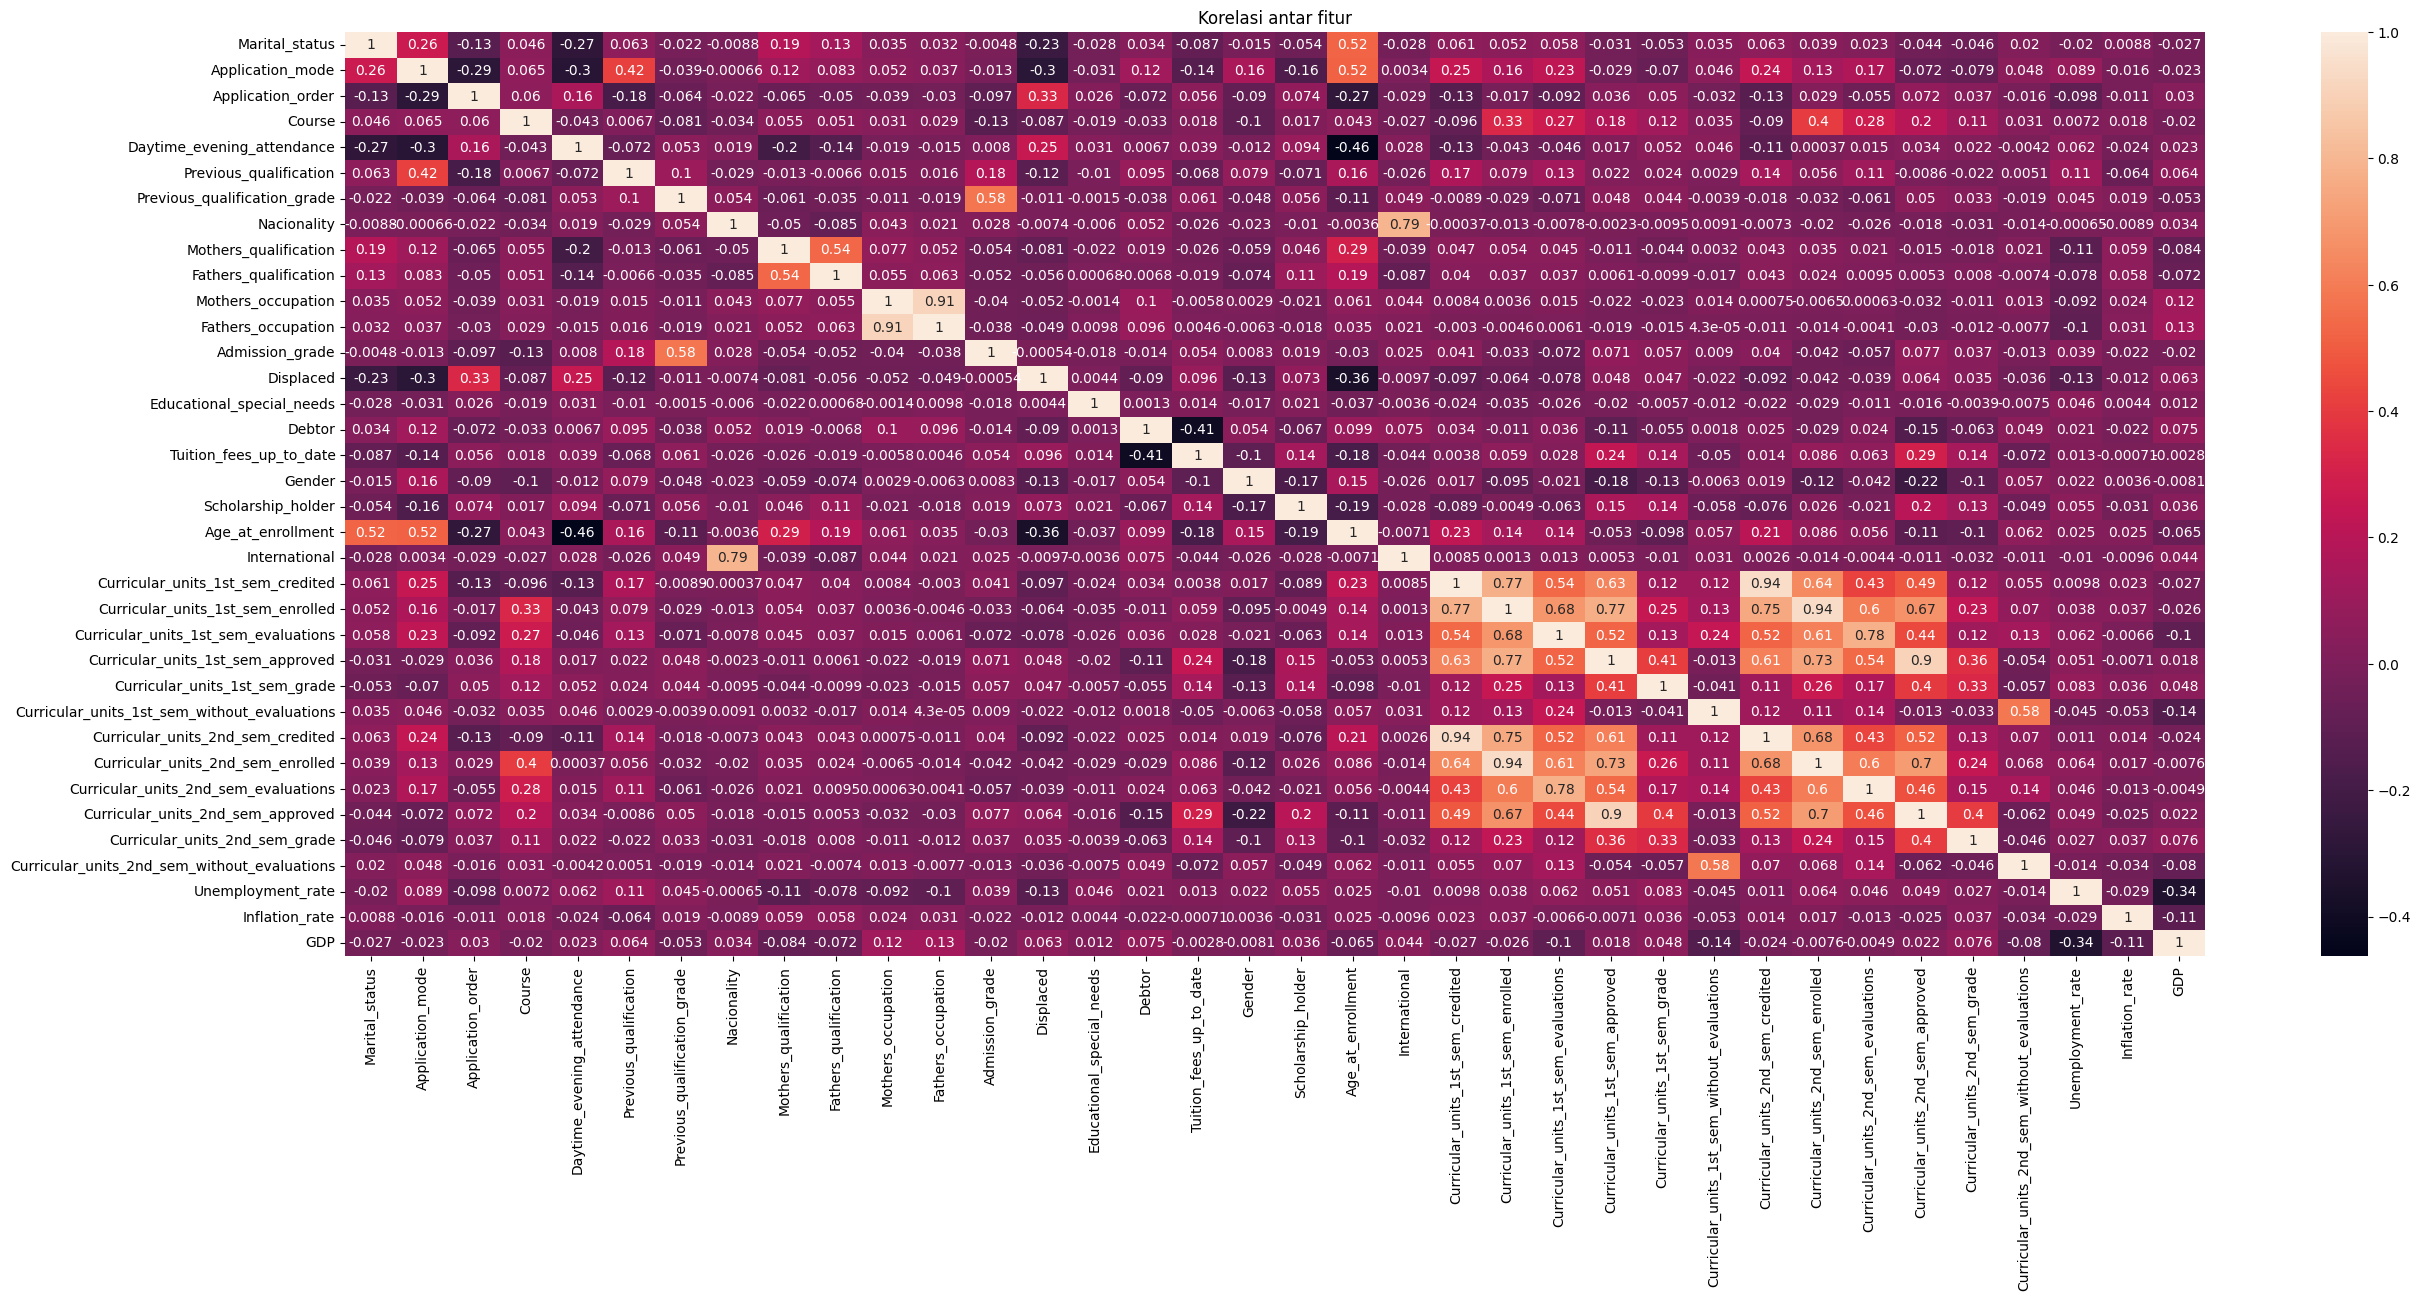

In [20]:
#Seleksi fitur dengan korelasi heatmap
plt.figure(figsize=(30,12))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(method='pearson'), annot =True)
plt.title('Korelasi antar fitur')
plt.show()

In [24]:
pca_numerical_columns_1 = [
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_evaluations', 
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_without_evaluations', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_evaluations', 
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations', 
]
 
pca_numerical_columns_2 = [
    'Previous_qualification_grade',
    'Admission_grade',
]

In [25]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

PCA pada numerical column pertama

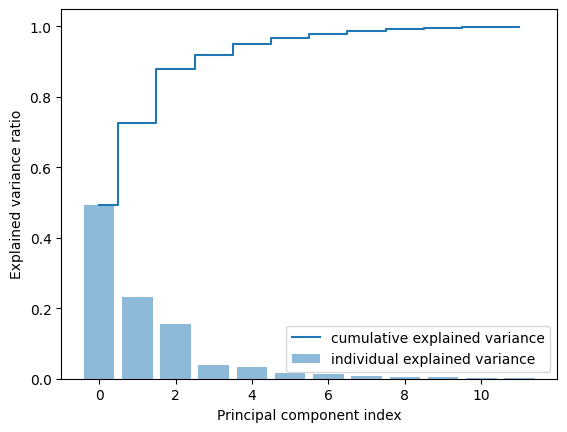

In [26]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [27]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.452632,0.412632,0.018868,0.811917,0.058573,-0.314622,-0.029936,0.001490
1,0.063158,0.063158,0.094340,0.331013,-0.471565,0.010895,0.216904,-0.046095
2,0.400000,0.370526,0.037736,-0.391476,-0.037208,-0.141584,-0.104123,0.129787
3,0.431579,0.246316,0.075472,0.112337,0.521640,-0.030081,0.019269,-0.050521
4,0.547368,0.556842,0.207547,-0.296323,-0.014193,0.040809,-0.032521,-0.066324


PCA pada numerical column kedua

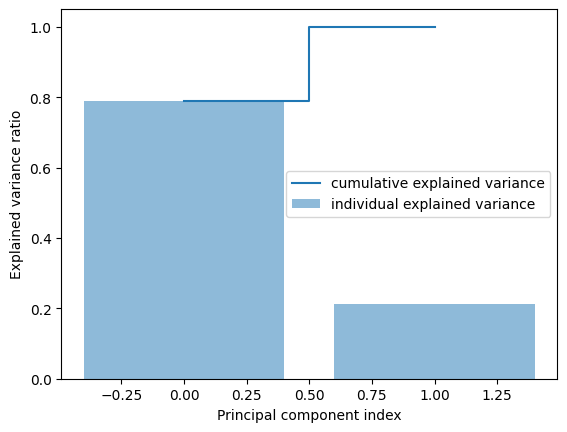

In [28]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [29]:
pca_2 = PCA(n_components=1, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age_at_enrollment,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1
0,0.018868,0.811917,0.058573,-0.314622,-0.029936,0.001490,0.104602
1,0.094340,0.331013,-0.471565,0.010895,0.216904,-0.046095,-0.413682
2,0.037736,-0.391476,-0.037208,-0.141584,-0.104123,0.129787,0.038477
3,0.075472,0.112337,0.521640,-0.030081,0.019269,-0.050521,-0.036056
4,0.207547,-0.296323,-0.014193,0.040809,-0.032521,-0.066324,0.275907


Pca untuk data test

In [30]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
 
test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Age_at_enrollment,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1
0,0.245283,-0.324733,-0.018796,0.054612,0.233318,0.037319,-0.123310
1,0.018868,0.599935,0.102369,-0.216711,0.013662,-0.015839,-0.099496
2,0.018868,0.682539,0.073950,-0.190667,-0.057760,-0.054457,0.015957
3,0.037736,0.341575,-0.494346,-0.069576,-0.010215,-0.050203,-0.237552
4,0.188679,-0.322386,-0.017572,0.085441,0.271339,0.088703,-0.174924


## Modeling

Modeling menggunakan Decision Tree

In [31]:
tree_model = DecisionTreeClassifier(random_state=123)
 
param_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [32]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [33]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini', 
    max_depth=8, 
    max_features='sqrt'
)
 
tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

Modeling menggunakan Random Forest

In [30]:
rdf_model = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [31]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [36]:
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=8, 
    n_estimators=500, 
    max_features='log2', 
    criterion='gini', 
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

Modeling dengan Logistic GradientBoosting

In [37]:
gboost_model = GradientBoostingClassifier(random_state=123)
 
param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}
 
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [38]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [39]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1, 
    max_depth=8, 
    max_features='log2',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [34]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    
    return confusion_matrix_df

Evaluasi model Decision Tree

              precision    recall  f1-score   support

     Dropout       0.78      0.59      0.67       316
    Enrolled       0.32      0.61      0.42       151
    Graduate       0.78      0.67      0.72       418

    accuracy                           0.63       885
   macro avg       0.63      0.62      0.60       885
weighted avg       0.70      0.63      0.65       885



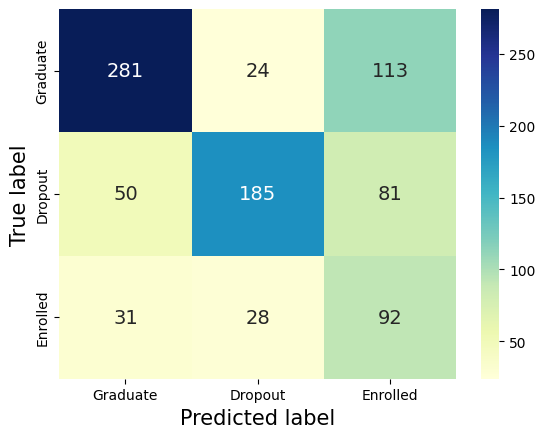

,Graduate,Dropout,Enrolled
Graduate,281,24,113
Dropout,50,185,81
Enrolled,31,28,92


In [35]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_test)

Evaluasi model Random forest

              precision    recall  f1-score   support

     Dropout       0.84      0.64      0.73       316
    Enrolled       0.39      0.59      0.47       151
    Graduate       0.81      0.81      0.81       418

    accuracy                           0.71       885
   macro avg       0.68      0.68      0.67       885
weighted avg       0.75      0.71      0.72       885



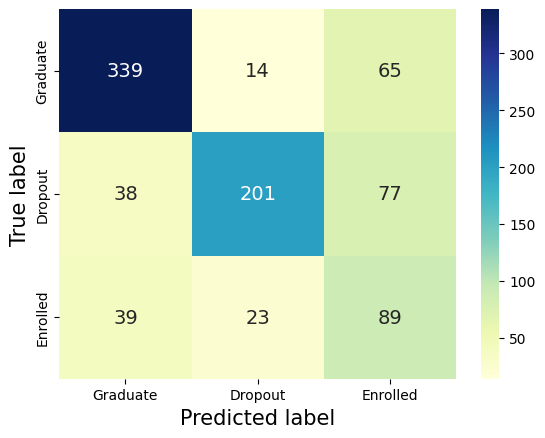

,Graduate,Dropout,Enrolled
Graduate,339,14,65
Dropout,38,201,77
Enrolled,39,23,89


In [40]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
 
evaluating(y_pred=y_pred_test, y_true=y_test)

Evaluasi model Gradient boosting

              precision    recall  f1-score   support

     Dropout       0.80      0.65      0.71       316
    Enrolled       0.38      0.37      0.38       151
    Graduate       0.75      0.87      0.81       418

    accuracy                           0.70       885
   macro avg       0.64      0.63      0.63       885
weighted avg       0.71      0.70      0.70       885



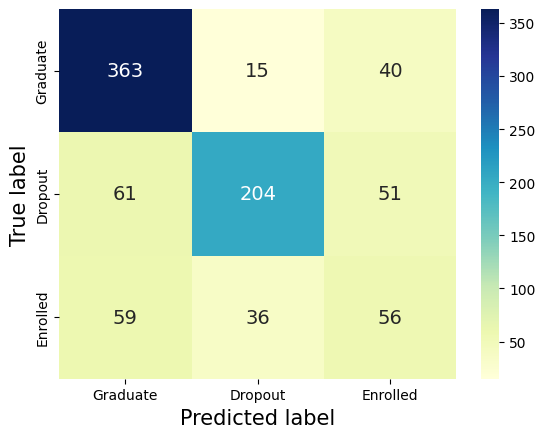

,Graduate,Dropout,Enrolled
Graduate,363,15,40
Dropout,61,204,51
Enrolled,59,36,56


In [41]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_test)

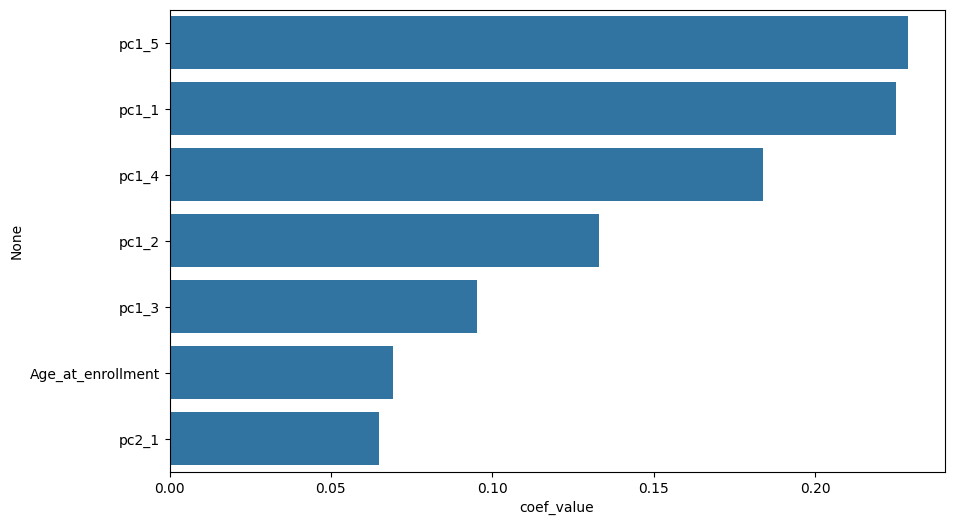

,coef_value
pc1_5,0.228651
pc1_1,0.224911
pc1_4,0.184003
pc1_2,0.133039
pc1_3,0.095201
Age_at_enrollment,0.069321
pc2_1,0.064875


In [42]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features
 
plot_feature_importances(rdf_model.feature_importances_, train_pca_df.columns)

## Make requirements.txt

In [41]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
